# Exploratory data analysis on preprocesed SMILES dataset

Zuzanna Gorczyca, zgo@kth.se

Alga Nour Elimane, nealga@kth.se

Tse An Shih, tashih@kth.se

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

### Load data

In [58]:
dir_path = os.getcwd()
train_path = os.path.join(dir_path, "datasets", "training_smiles_processed2.csv")

train_data = pd.read_csv(train_path, index_col="INDEX")

## EDA

Find shape of data

In [59]:
train_data.shape

(202416, 131)

In training data we have 202,895 samples with 3 features.
One is index, and one is label.

Columns names

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202416 entries, 1 to 202655
Columns: 131 entries, NoAtoms to ACTIVE
dtypes: float64(125), int64(6)
memory usage: 203.8 MB


Non coulms with missing data or non-value colums.

Missing values

In [61]:
pd.DataFrame({'Null Values':train_data.isnull().sum()})


,Null Values
NoAtoms,0
CalcExactMolWt,0
fr_Al_COO,0
HeavyAtomCount,0
NumHDonors,0
...,...
MFp_120,0
MFp_121,0
MFp_122,0
MFp_123,0


Print firsts rows of dataset

In [62]:
train_data.head(5)

,NoAtoms,CalcExactMolWt,fr_Al_COO,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,...,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123,ACTIVE
INDEX,,,,,,,,,,,,,,,,,,,,,
1,9,9,0,9,1,2,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1,2,0,1,0,1,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,9,9,0,9,0,3,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8,8,0,8,1,2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2,2,0,2,1,3,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


BOXPLOTS

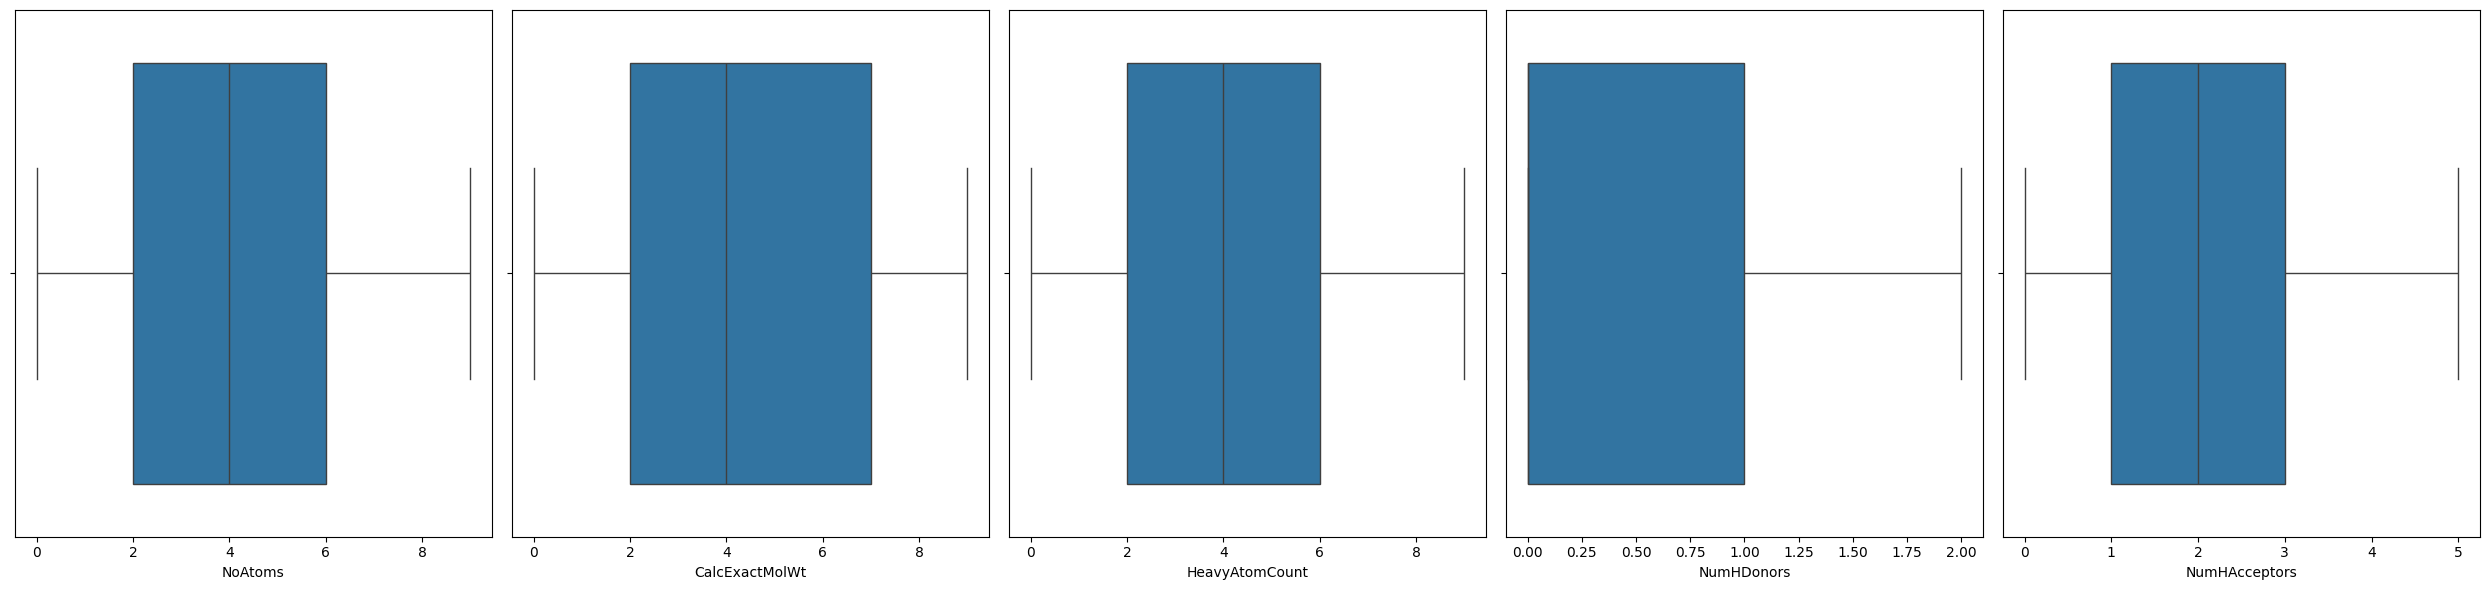

In [63]:
num_vars = ["NoAtoms", "CalcExactMolWt", "HeavyAtomCount", "NumHDonors", "NumHAcceptors"]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 6))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

HISTOGRAMS

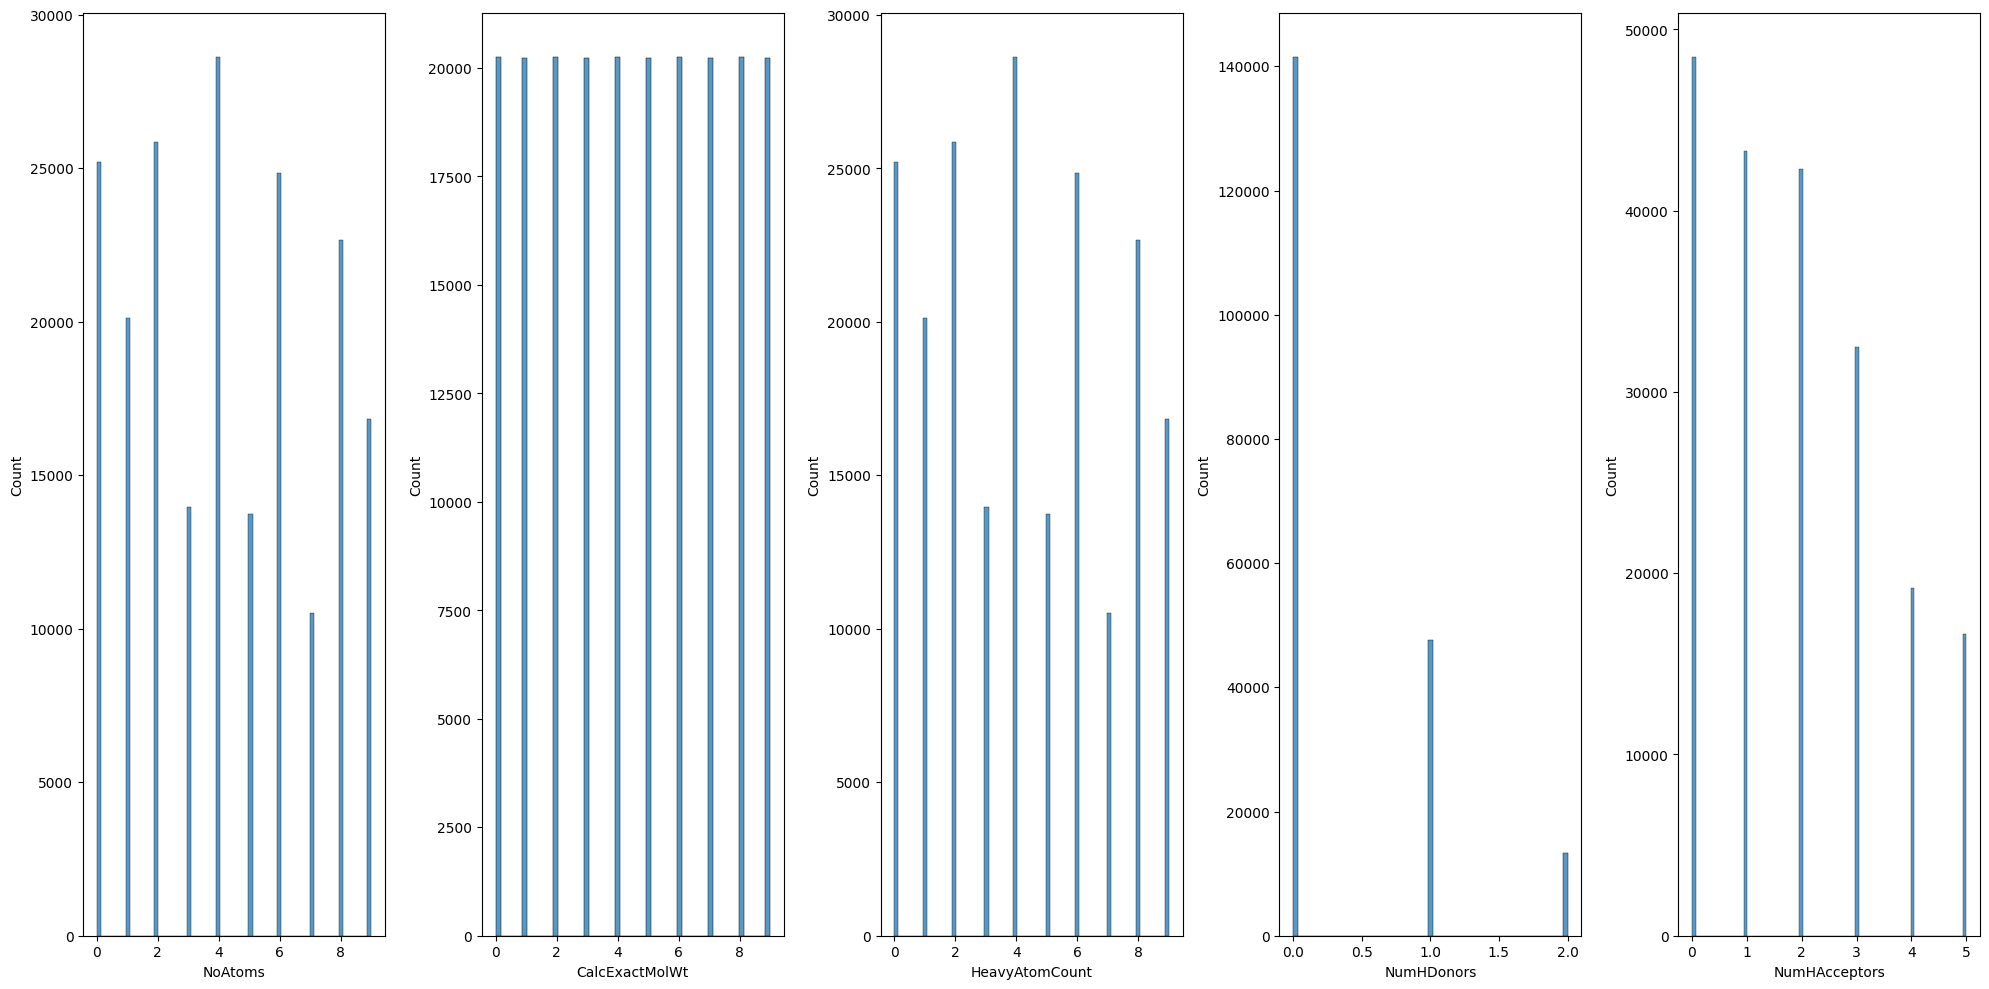

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

In [ ]:
# Select only numeric columns for correlation
train_data_numeric = train_data["NoAtoms", "CalcExactMolWt", "fr_Al_COO", "HeavyAtomCount", "NumHDonors", "NumHAcceptors"]

plt.figure(figsize=(20, 16))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True)

In [67]:
train_data["ACTIVE"].describe()

count    202416.000000
mean          0.061714
std           0.240637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ACTIVE, dtype: float64

In [68]:
y_data = train_data["ACTIVE"]
x_data = train_data.drop("ACTIVE", axis=1)

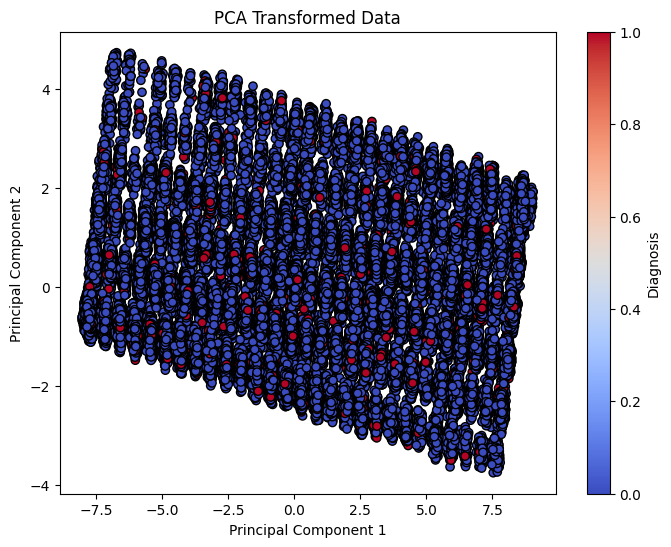

In [69]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_data)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_data, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()